In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from pylab import rcParams

# rcParams['figure.figsize'] = 35, 25

# для построения моделей воспользуемся sklearn


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
#from MulticoreTSNE import MulticoreTSNE as TSNE
import plotly.graph_objs as go
from sklearn.metrics import silhouette_score
from tqdm import tqdm

%matplotlib inline

In [2]:
#выключаем scintific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Функция для скалирования и инвертирования
def make_scale(dataframe, inv=0):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(dataframe)
    if inv == 0:
        return scaled
    elif inv == 1:
        inversed = scaler.inverse_transform(scaled)
        return inversed

In [4]:
# Функция для преобразования РСА
def make_PCA(dataframe, n=2):
    converter_pca = PCA(n_components=n, random_state=42)
    return converter_pca.fit_transform(dataframe)

In [5]:
# Функция для преобразования UMAP
def make_UMAP(dataframe, n=2):
    converter_umap = umap.UMAP(n_components=n,random_state=42)
    return converter_umap.fit_transform(dataframe)

In [6]:
# Функция для преобразования tSNE
def make_TSNE(dataframe, n=2):
    tsne = TSNE(n_components=n, random_state=42, n_jobs=-1)
    return tsne.fit_transform(dataframe)

In [7]:
# функция для выводя двумерных графиков без кластеризации
def make_2D_plot(dataframe,  plot_name='*******', xaxis=0, yaxis=1):
    sns.set(rc={"figure.figsize":( 15, 8 )})
    fig = sns.scatterplot(x=dataframe[:,xaxis], y=dataframe[:,yaxis]).set(title=plot_name)
    return fig

In [8]:
# функция для выводя трёхмерных графиков без кластеризации
def make_3D_plot(dataframe, plot_name='*******'):

    data = dataframe
    fig = go.Scatter3d(x=data[:, 0],
                        y=data[:, 1],
                        z=data[:, 2],
                        marker=dict(opacity=0.9,
                                    reversescale=True,
                                    colorscale='Blues',
                                    size=4
                                    ),
                        line=dict (width=0.02),
                        mode='markers',

                        )

    layout = go.Layout(scene=dict(  xaxis=dict( title="data[0]"),
                                     yaxis=dict( title="data[1]"),
                                     zaxis=dict(title="data[2]")),
                        title=plot_name
                        )

    fig = go.Figure(data=fig, layout=layout)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    return fig.show()

In [9]:
# функция для определения оптимального количества кластеров методом локтя
def make_kMeans_Elbow_Method(dataframe):
    k_max = 10

    inertia = []
    for k in tqdm(range(1, k_max)):
        kmeans = KMeans(n_clusters=k).fit(dataframe)
        inertia.append(np.sqrt(kmeans.inertia_))

    d = {}
    for k in tqdm(range(2, k_max-1)):
        i = k - 1
        d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

    plt.figure(figsize=(13, 5))
    plt.plot(range(2, k_max-1), [x for x in d.values()], marker='s')

    plt.title('The Elbow Method using Inertia Index')
    plt.xlabel('Number of clusters k')
    plt.ylabel('Comparative decrease in inertia')


    return plt.show()

In [10]:
# функция для определения оптимального количества кластеров методом Силуэт
def make_kmeans_silhouette(dataset, plot_name='******'):

    silhouette = []
    for i in tqdm(range(2,11)):
        kmeans = KMeans(n_clusters=i, random_state=42).fit(dataset)
        labels = kmeans.labels_
        score = silhouette_score(dataset, labels)
        silhouette.append(score)

    plt.plot(range(2,11), silhouette, marker='|')

    plt.title(f'{plot_name} Метод локтя Коэффициент силуэта')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Коэффициент силуэта')

    return plt.show()

In [11]:
#  функция для выводя двумерных графиков кластеров, построенных методом KMeans
def make_2D_plot_kmeans(dataframe, n=2, plot_name='******'):
    kmeans = KMeans(n_clusters=n, random_state=42)

    kmeans.fit(dataframe)
    plt.figure(figsize=(15, 8))

    plt.scatter(dataframe[:,0], dataframe[:,1], c=kmeans.labels_, s=20, cmap='coolwarm')

    plt.title(plot_name)
    plt.xlabel('Количество кластеров')
    plt.ylabel('Коэффициент K-means')

    return plt.show()

In [12]:
# функция для выводя трёхмерных графиков с кластеризацией
def Data_Color(i):

    if (i == 0):
        return "red"

    elif (i == 1):
        return "green"

    elif (i == 2):
        return "yellow"

def make_3D_plot_kmeans(dataframe, plot_name='*******', n=2):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(dataframe)

    data = dataframe
    fig = go.Scatter3d(x=data[:, 0],
                       y=data[:, 1],
                       z=data[:, 2],
                       marker=dict(opacity=0.9,
                                   reversescale=True,
                                   color=list(map(Data_Color, kmeans.labels_)),
                                   size=4
                                   ),
                       line=dict (width=0.02),
                       mode='markers',

                       )

    #Make Plot.ly Layout
    layout = go.Layout(scene=dict(  xaxis=dict( title="data[0]"),
                                    yaxis=dict( title="data[1]"),
                                    zaxis=dict(title="data[2]")),
                       title=plot_name
                       )

    fig = go.Figure(data=fig, layout=layout)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    return fig.show()

В этом ноутбуке делаем подгоовку датасета, скалирование, преобразование размерносии кластеризацию по методу k-means.
Результатом работы с исходным набором данных должен быть датасет без NaN, с произведённым скейлом вещественных и кодированием категориальных признаков.
посмотрим на данные на графиках.

# Dataset Loading + Base EDA

In [13]:
Ger_Cr_df = pd.read_csv(r'D:\Otus\Machine Learning. PRO\9.  Обучение без учителя. Иерархическая кластеризация. DB-Scan\02_HW\german_credit_data.csv')

In [14]:
Ger_Cr_df = Ger_Cr_df.drop('Unnamed: 0', axis=1)

In [15]:
Ger_Cr_df.columns = Ger_Cr_df.columns.str.replace(' ', '_')

In [16]:
Ger_Cr_df

Age     Sex  Job Housing Saving_accounts Checking_account  Credit_amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              Purpose  Risk  
0           6             radio/TV  good  
1          48             radio/TV   bad  
2          12            education  good  
3          42  furniture/equipment  good  
4          24                  car   bad  
..        ...                  ...   ...  
995        12  furniture/equipment  good  
996        30                  car  good  
997        12             radio/TV  good  
998        45             radio/TV   bad  
999        45                  car  good  

[1000 rows x 10 columns]

In [17]:
Ger_Cr_df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [17]:
# Проверка гипотезы о том, что эти колонки ни на что не влияют была произведена в другом ноутбуке, поэтому избавляемся от них.
Etalon_no_SA_CA = Ger_Cr_df.drop(['Checking_account', 'Saving_accounts'], axis=1)

In [18]:
# Etalon_no_SA_CA_risk = Ger_Cr_df.drop(['Checking_account', 'Saving_accounts', 'Risk'], axis=1)

In [19]:
Etalon_no_SA_CA = Etalon_no_SA_CA.replace({"female":0,"male":1})

In [20]:
Etalon_no_SA_CA = Etalon_no_SA_CA.replace({"bad":0,"good":1})

In [21]:
Etalon_no_SA_CA_oh_en = pd.get_dummies(Etalon_no_SA_CA)

In [22]:
Etalon_no_SA_CA_oh_en.shape # Etalon_no_SA_CA_oh_en.shape  - это полный датасет(выброшены колонки с NaN), кодированный, НЕ скалированный

(1000, 17)

In [23]:
Etalon_Risk_good_oh_en = Etalon_no_SA_CA_oh_en.query('Risk == 1') #
# Etalon_Risk_good_oh_en.shape # (700, 17)

In [24]:
Etalon_Risk_bad_oh_en = Etalon_no_SA_CA_oh_en.query('Risk == 0') #
# Etalon_Risk_bad_oh_en.shape # (300, 17)

In [25]:
# избавимся от колонки с целевой переменной
Etalon_no_SA_CA_oh_en_no_risk = Etalon_no_SA_CA_oh_en.drop(['Risk'], axis=1)
Etalon_Risk_good_oh_en = Etalon_Risk_good_oh_en.drop(['Risk'], axis=1)
Etalon_Risk_bad_oh_en = Etalon_Risk_bad_oh_en.drop(['Risk'], axis=1)

# Data scaling

In [26]:
Etalon_no_SA_CA_oh_en_no_risk_scale = make_scale(Etalon_no_SA_CA_oh_en_no_risk) # общий датасет со всеми клиентами
Etalon_Risk_good_oh_en_scale = make_scale(Etalon_Risk_good_oh_en) # датасет только с теми клиентами, кому ОДОБРЕН кредит
Etalon_Risk_bad_oh_en_scale = make_scale(Etalon_Risk_bad_oh_en) # датасет только с теми клиентами, кому НЕ! ОДОБРЕН кредит

# Basic Plotting and Dimensionality Reduction (PCA, UMAP, TSNE)

# Dimensionality Reduction PCA

In [27]:
Etalon_no_SA_CA_oh_en_no_risk_scale_PCA  = make_PCA(Etalon_no_SA_CA_oh_en_no_risk_scale)
Etalon_Risk_good_oh_en_scale_PCA = make_PCA(Etalon_Risk_good_oh_en_scale)
Etalon_Risk_bad_oh_en_scale_PCA = make_PCA(Etalon_Risk_bad_oh_en_scale)


# Dimensionality Reduction UMAP

In [28]:
Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP = make_UMAP(Etalon_no_SA_CA_oh_en_no_risk_scale)
Etalon_Risk_good_oh_en_scale_UMAP = make_UMAP(Etalon_Risk_good_oh_en_scale)
Etalon_Risk_bad_oh_en_scale_UMAP = make_UMAP(Etalon_Risk_bad_oh_en_scale)


# Dimensionality Reduction TSNE

In [29]:
Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE = make_TSNE(Etalon_no_SA_CA_oh_en_no_risk_scale)
Etalon_Risk_good_oh_en_scale_TSNE = make_TSNE(Etalon_Risk_good_oh_en_scale)
Etalon_Risk_bad_oh_en_scale_TSNE = make_TSNE(Etalon_Risk_bad_oh_en_scale)


# Basic Plotting
Все графики будут выводиться по три подряд - сначала выводим полный датасет,
 потом по отдельности датасет с клиентами, кому одобрен кредит, и потом датесет с отказниками.
Это сделано для того, чтобы наглядно убедиться в том, что в этом датасете кластеризация будет показывать не корректно,
 т.к. в идеале кластеры должны продемонстрировать разделение данных на 2 части в соотношении 7:3 - эта информация взята из полного датасета,
 в котором колонка Risk обозначает одобрят или откажут клиенту в кредите.

<AxesSubplot:>

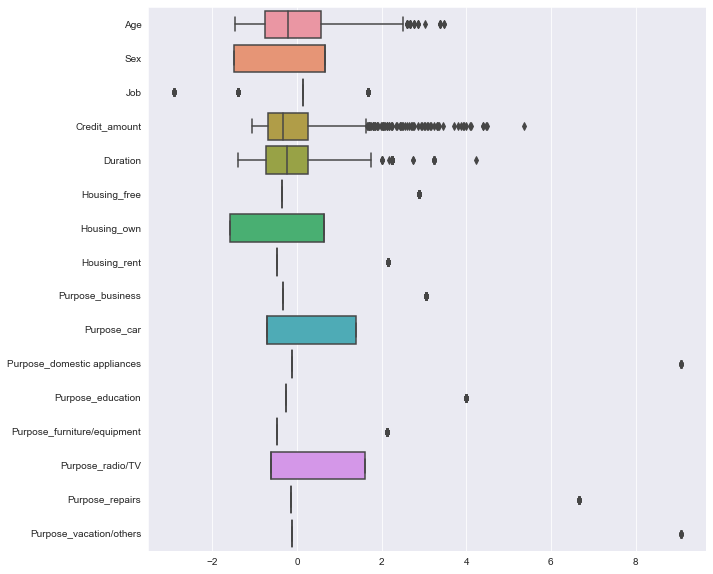

In [30]:
Etalon_no_SA_CA_oh_en_no_risk.columns.to_list()
Etalon_scale_boxplot = pd.DataFrame(Etalon_no_SA_CA_oh_en_no_risk_scale, columns=Etalon_no_SA_CA_oh_en_no_risk.columns.to_list())
plt.figure(figsize=(10,10))
sns.boxplot(data=Etalon_scale_boxplot, orient='h')

In [31]:
Etalon_scale_boxplot

Age    Sex    Job  Credit_amount  Duration  Housing_free  Housing_own  \
0    2.766  0.670  0.147         -0.745    -1.236        -0.348        0.634   
1   -1.191 -1.492  0.147          0.950     2.248        -0.348        0.634   
2    1.183  0.670 -1.384         -0.417    -0.739        -0.348        0.634   
3    0.832  0.670  0.147          1.634     1.750         2.874       -1.576   
4    1.535  0.670  0.147          0.567     0.257         2.874       -1.576   
..     ...    ...    ...            ...       ...           ...          ...   
995 -0.400 -1.492 -1.384         -0.544    -0.739        -0.348        0.634   
996  0.392  0.670  1.678          0.208     0.755        -0.348        0.634   
997  0.216  0.670  0.147         -0.875    -0.739        -0.348        0.634   
998 -1.103  0.670  0.147         -0.506     1.999         2.874       -1.576   
999 -0.752  0.670  0.147          0.462     1.999        -0.348        0.634   

     Housing_rent  Purpose_business  Purpose_car  Purpose_domestic appliances  \
0          -0.467            -0.328       -0.713                       -0.110   
1          -0.467            -0.328       -0.713                       -0.110   
2          -0.467            -0.328       -0.713                       -0.110   
3          -0.467            -0.328       -0.713                       -0.110   
4          -0.467            -0.328        1.403                       -0.110   
..            ...               ...          ...                          ...   
995        -0.467            -0.328       -0.713                       -0.110   
996        -0.467            -0.328        1.403                       -0.110   
997        -0.467            -0.328       -0.713                       -0.110   
998        -0.467            -0.328       -0.713                       -0.110   
999        -0.467            -0.328        1.403                       -0.110   

     Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0               -0.250                       -0.470             1.604   
1               -0.250                       -0.470             1.604   
2                3.994                       -0.470            -0.624   
3               -0.250                        2.127            -0.624   
4               -0.250                       -0.470            -0.624   
..                 ...                          ...               ...   
995             -0.250                        2.127            -0.624   
996             -0.250                       -0.470            -0.624   
997             -0.250                       -0.470             1.604   
998             -0.250                       -0.470             1.604   
999             -0.250                       -0.470            -0.624   

     Purpose_repairs  Purpose_vacation/others  
0             -0.150                   -0.110  
1             -0.150                   -0.110  
2             -0.150                   -0.110  
3             -0.150                   -0.110  
4             -0.150                   -0.110  
..               ...                      ...  
995           -0.150                   -0.110  
996           -0.150                   -0.110  
997           -0.150                   -0.110  
998           -0.150                   -0.110  
999           -0.150                   -0.110  

[1000 rows x 16 columns]

TSNE

[Text(0.5, 1.0, 'Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE')]

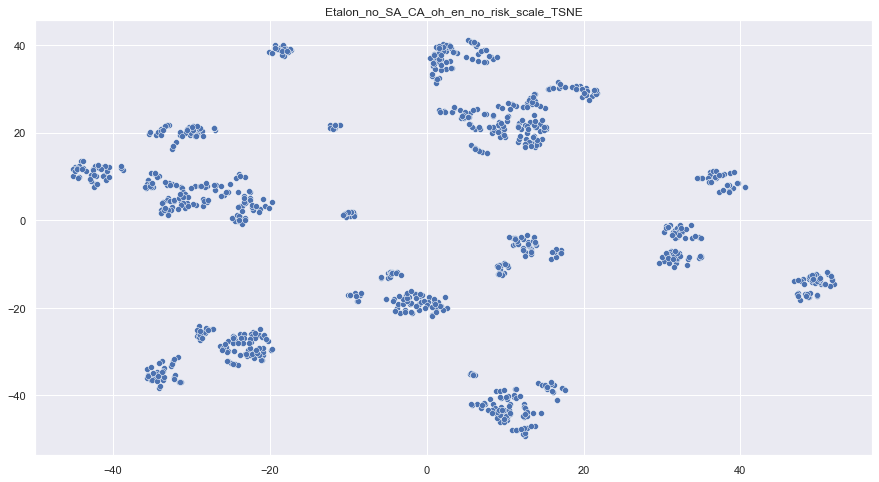

In [32]:
make_2D_plot(Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE, 'Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE')

[Text(0.5, 1.0, 'Etalon_Risk_good_oh_en_scale_TSNE')]

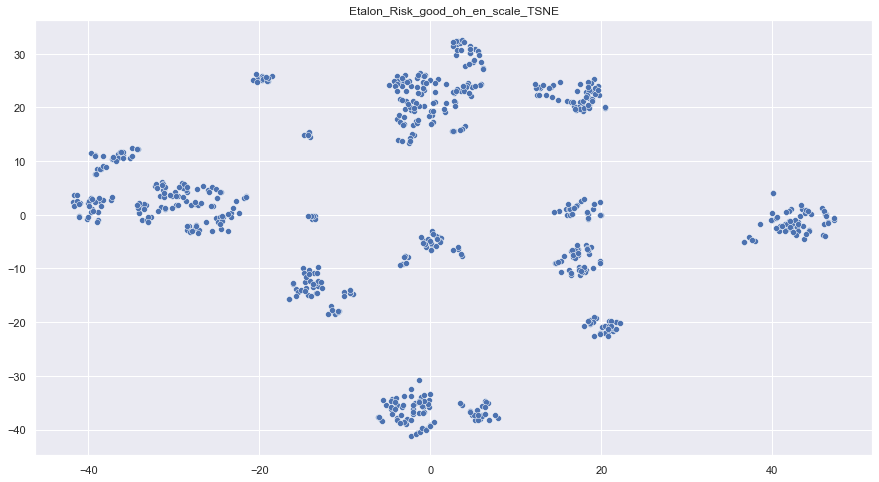

In [33]:
make_2D_plot(Etalon_Risk_good_oh_en_scale_TSNE, 'Etalon_Risk_good_oh_en_scale_TSNE')

[Text(0.5, 1.0, 'Etalon_Risk_bad_oh_en_scale_TSNE')]

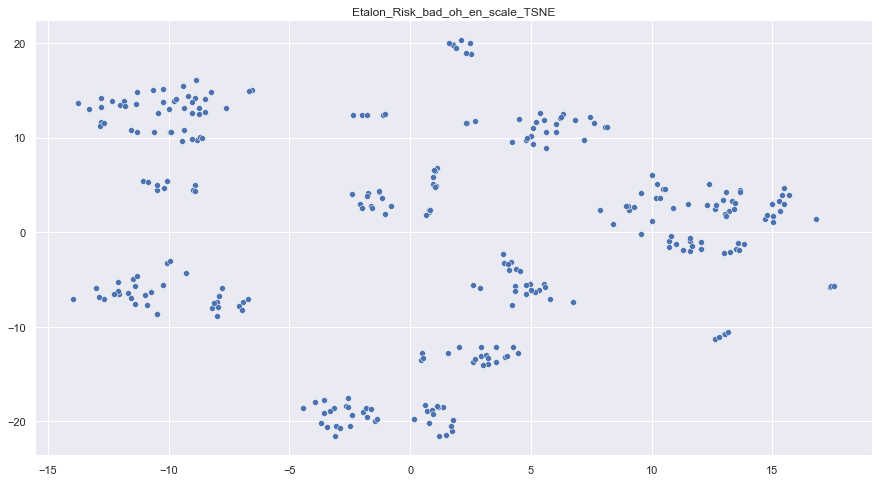

In [34]:
make_2D_plot(Etalon_Risk_bad_oh_en_scale_TSNE, 'Etalon_Risk_bad_oh_en_scale_TSNE')

UMAP

[Text(0.5, 1.0, 'Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP')]

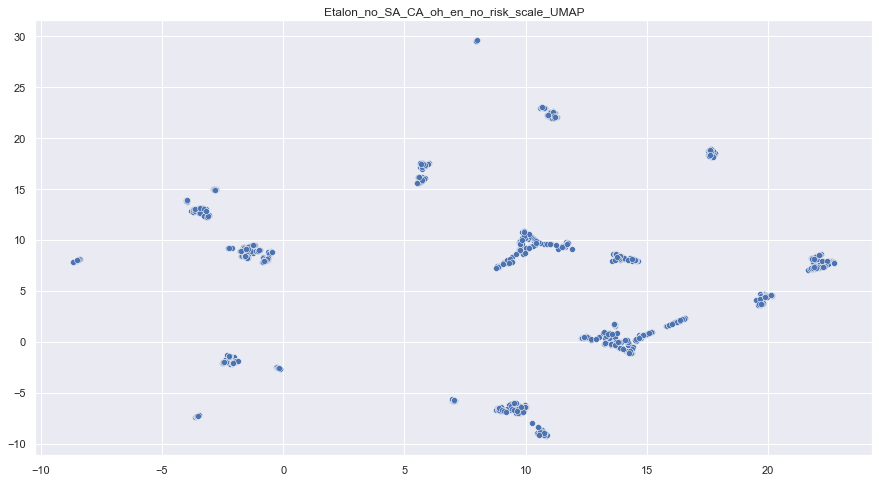

In [35]:
make_2D_plot(Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP, 'Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP')

[Text(0.5, 1.0, 'Etalon_Risk_good_oh_en_scale_UMAP')]

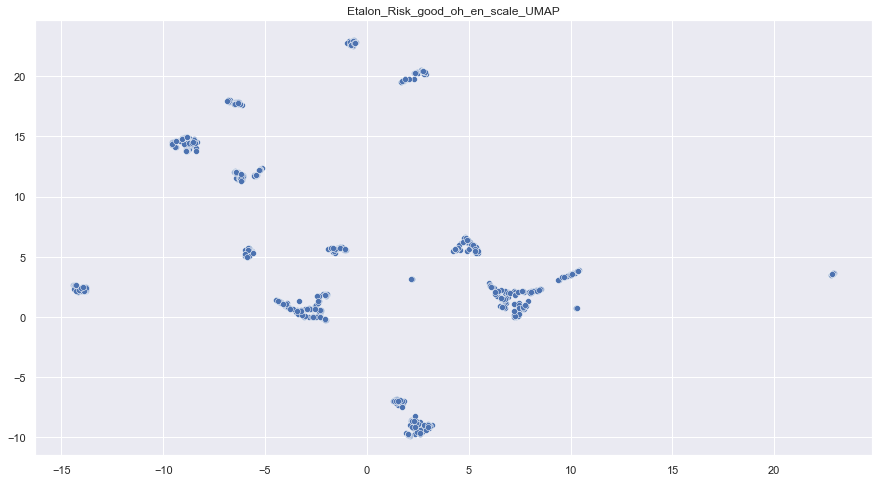

In [36]:
make_2D_plot(Etalon_Risk_good_oh_en_scale_UMAP, 'Etalon_Risk_good_oh_en_scale_UMAP')

[Text(0.5, 1.0, 'Etalon_Risk_bad_oh_en_scale_UMAP')]

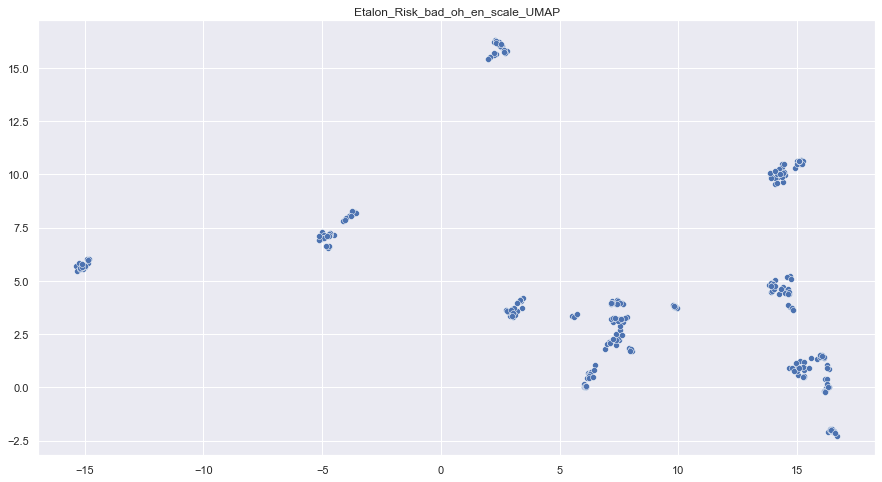

In [37]:
make_2D_plot(Etalon_Risk_bad_oh_en_scale_UMAP, 'Etalon_Risk_bad_oh_en_scale_UMAP')

PCA

[Text(0.5, 1.0, 'Etalon_no_SA_CA_oh_en_no_risk_scale_PCA')]

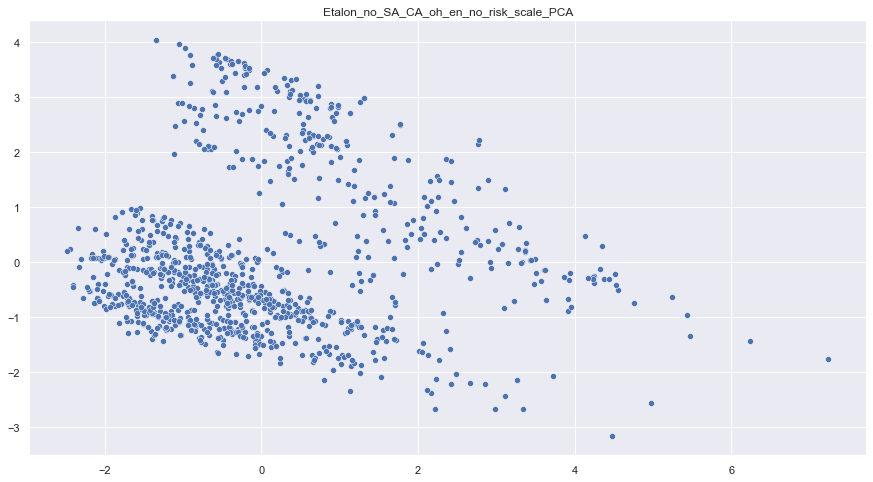

In [38]:
make_2D_plot(Etalon_no_SA_CA_oh_en_no_risk_scale_PCA,'Etalon_no_SA_CA_oh_en_no_risk_scale_PCA')

[Text(0.5, 1.0, 'Etalon_Risk_good_oh_en_scale_PCA')]

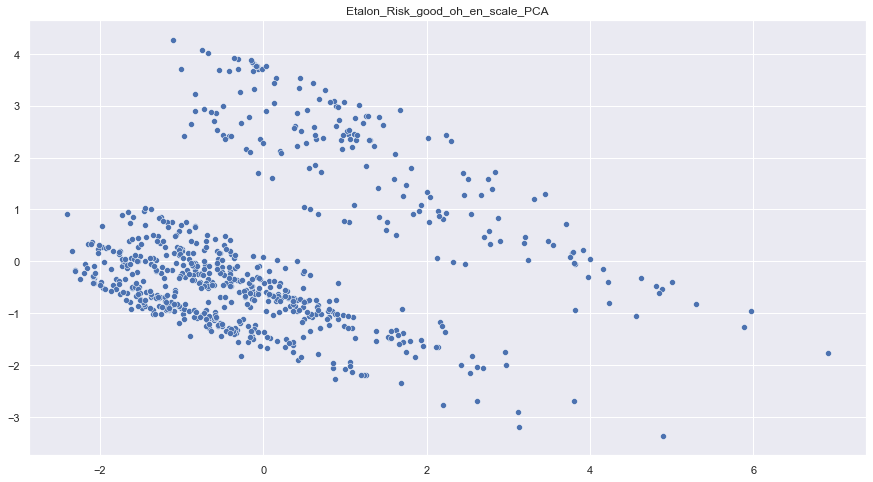

In [39]:
make_2D_plot(Etalon_Risk_good_oh_en_scale_PCA, 'Etalon_Risk_good_oh_en_scale_PCA')

[Text(0.5, 1.0, 'Etalon_Risk_bad_oh_en_scale_PCA')]

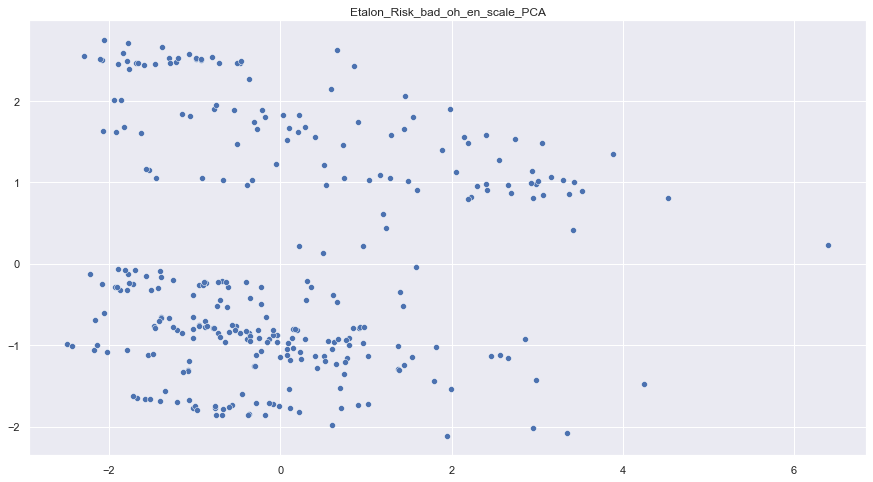

In [40]:
make_2D_plot(Etalon_Risk_bad_oh_en_scale_PCA, 'Etalon_Risk_bad_oh_en_scale_PCA')

всё плохо - датасет не для кластеризации или надо брать сырой иходник на 20 колонок не форматированной информации.

теперь построим 3D графики, может там интереснее будет?
но для этого надо переделать уменьшение размерности до 3

PCA

In [41]:
Etalon_no_SA_CA_oh_en_no_risk_scale_PCA_3  = make_PCA(Etalon_no_SA_CA_oh_en_no_risk_scale,3)
Etalon_Risk_good_oh_en_scale_PCA_3 = make_PCA(Etalon_Risk_good_oh_en_scale,3)
Etalon_Risk_bad_oh_en_scale_PCA_3 = make_PCA(Etalon_Risk_bad_oh_en_scale,3)

In [42]:
make_3D_plot(Etalon_no_SA_CA_oh_en_no_risk_scale_PCA_3)

In [43]:
make_3D_plot(Etalon_Risk_good_oh_en_scale_PCA_3)

In [44]:
make_3D_plot(Etalon_Risk_good_oh_en_scale_PCA_3)

UMAP

In [45]:
Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP_3 = make_UMAP(Etalon_no_SA_CA_oh_en_no_risk_scale,3)
Etalon_Risk_good_oh_en_scale_UMAP_3 = make_UMAP(Etalon_Risk_good_oh_en_scale,3)
Etalon_Risk_bad_oh_en_scale_UMAP_3 = make_UMAP(Etalon_Risk_bad_oh_en_scale,3)

In [46]:
make_3D_plot(Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP_3)

In [47]:
make_3D_plot(Etalon_Risk_good_oh_en_scale_UMAP_3)

In [48]:
make_3D_plot(Etalon_Risk_bad_oh_en_scale_UMAP_3)

TSNE

In [49]:
Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE_3 = make_TSNE(Etalon_no_SA_CA_oh_en_no_risk_scale,3)
Etalon_Risk_good_oh_en_scale_TSNE_3 = make_TSNE(Etalon_Risk_good_oh_en_scale,3)
Etalon_Risk_bad_oh_en_scale_TSNE_3 = make_TSNE(Etalon_Risk_bad_oh_en_scale,3)

In [50]:
make_3D_plot(Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE_3)

In [51]:
make_3D_plot(Etalon_Risk_good_oh_en_scale_TSNE_3)

In [52]:
make_3D_plot(Etalon_Risk_bad_oh_en_scale_TSNE_3)

PCA ничего не показывает, а вот UMAP и TSNE демонстрируют интересный результат
сейчас тут готовый датасет без NaN? с кодировкой и скалированием

In [53]:
Etalon_no_SA_CA_oh_en_no_risk.to_csv('Etalon_no_SA_CA_oh_en_no_risk.csv', index=False)

# Часть 2. Моделирование. k-means

буду пробовать строить модели по датасетам до преобразования размерности и после. использовать буду только полный датасет.

k-means метод Локотя

  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\Rost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

100%|██████████| 7/7 [00:00<?, ?it/s]


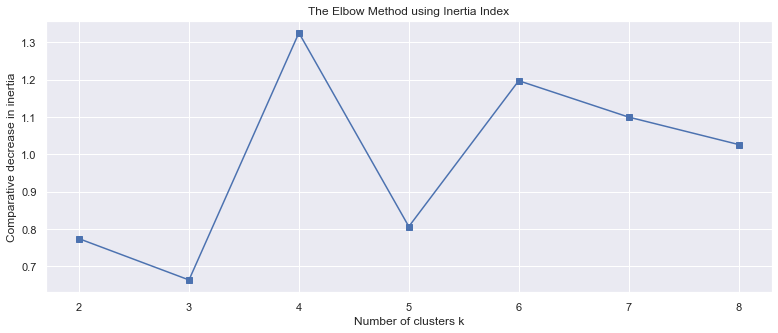

In [54]:
make_kMeans_Elbow_Method(Etalon_no_SA_CA_oh_en_no_risk_scale)

  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\Rost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

100%|██████████| 7/7 [00:00<?, ?it/s]


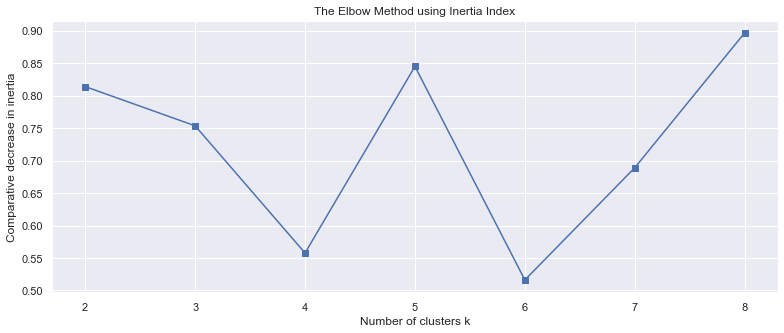

In [55]:
make_kMeans_Elbow_Method(Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE)

  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\Rost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

100%|██████████| 7/7 [00:00<?, ?it/s]


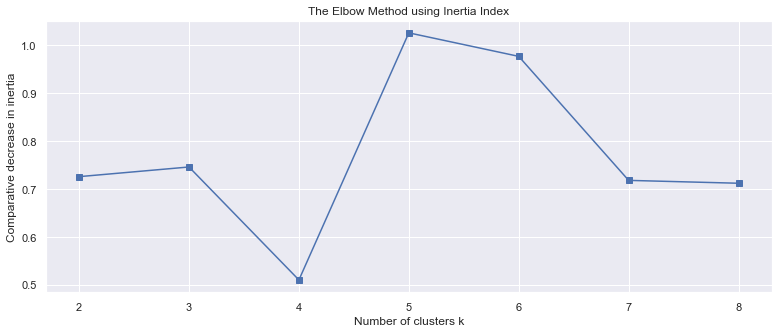

In [56]:
make_kMeans_Elbow_Method(Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP)

  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\Rost\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

100%|██████████| 7/7 [00:00<?, ?it/s]


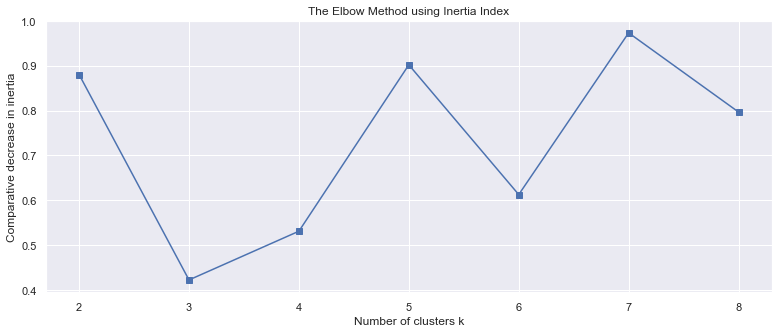

In [57]:
make_kMeans_Elbow_Method(Etalon_no_SA_CA_oh_en_no_risk_scale_PCA)

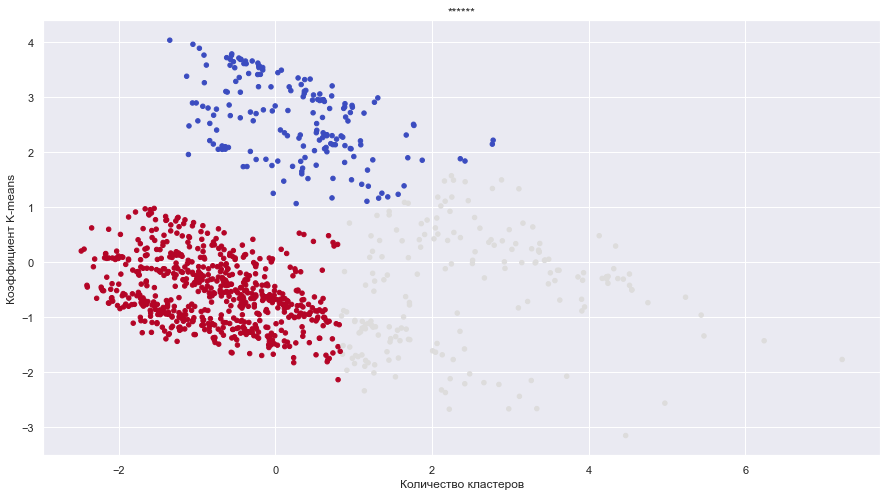

In [58]:
make_2D_plot_kmeans(Etalon_no_SA_CA_oh_en_no_risk_scale_PCA,3)

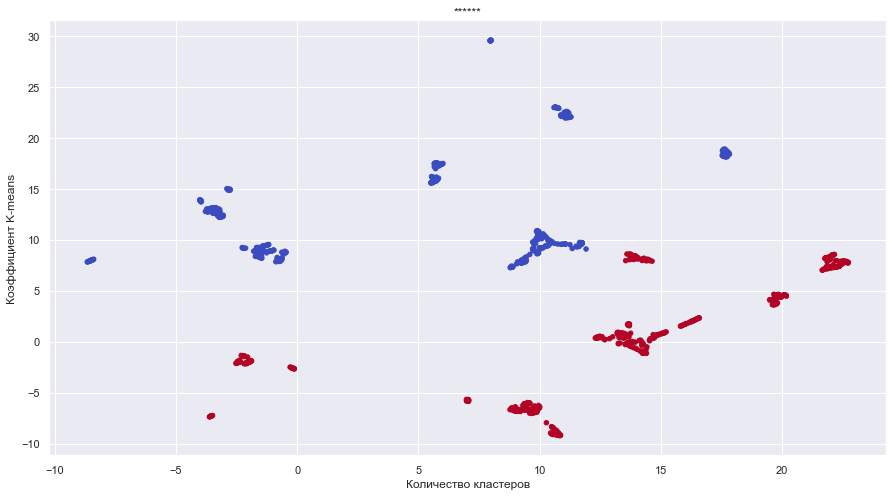

In [59]:
make_2D_plot_kmeans(Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP,2)

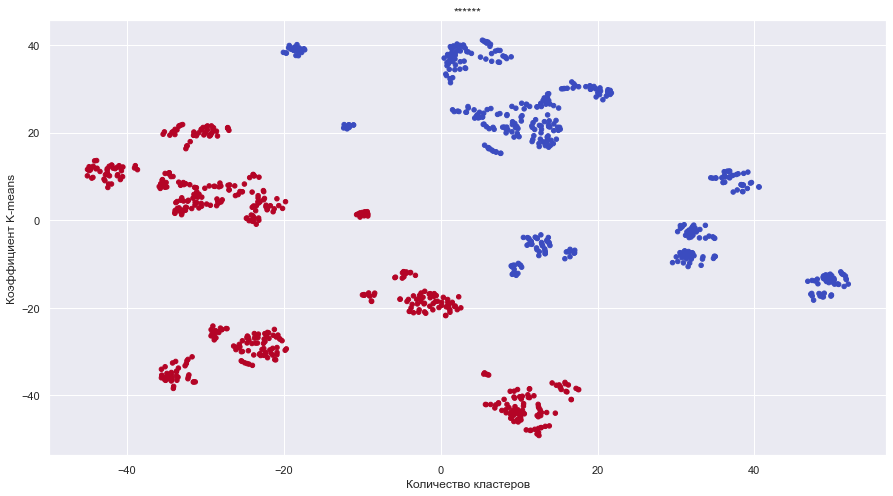

In [60]:
make_2D_plot_kmeans(Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE,2)

k-means метод Силуэт

100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


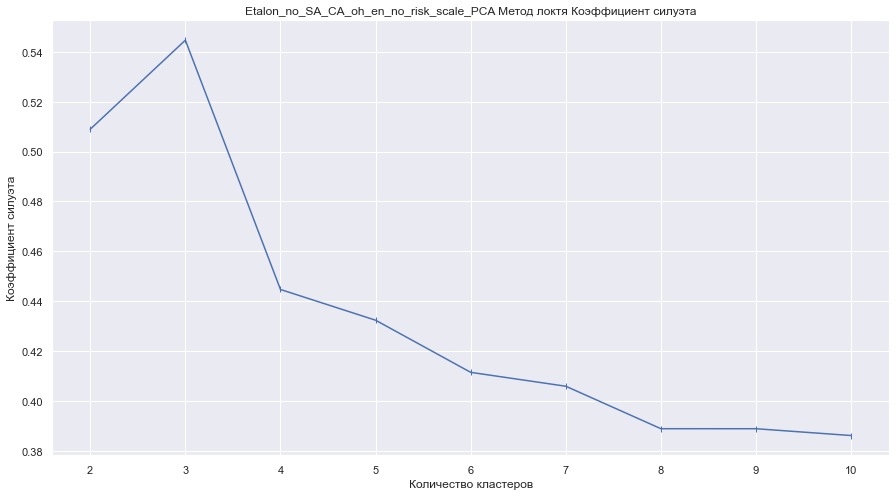

In [61]:
make_kmeans_silhouette(Etalon_no_SA_CA_oh_en_no_risk_scale_PCA, 'Etalon_no_SA_CA_oh_en_no_risk_scale_PCA')

100%|██████████| 9/9 [00:00<00:00, 10.01it/s]


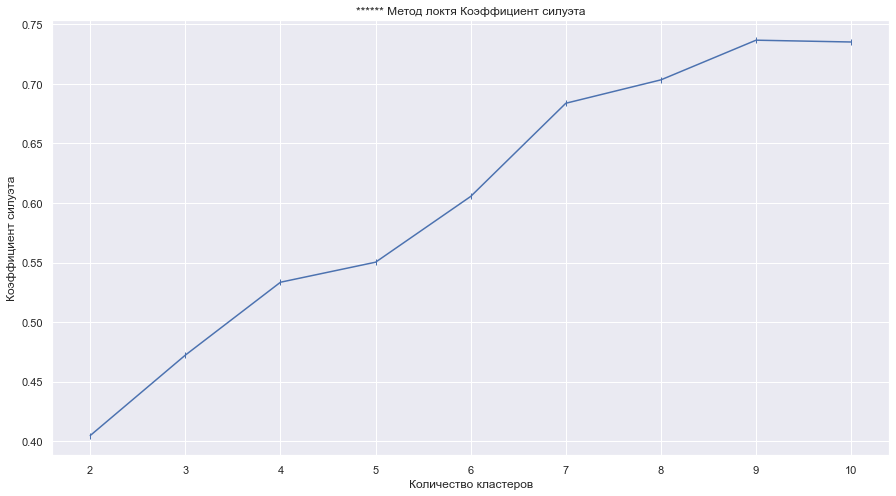

In [62]:
make_kmeans_silhouette(Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP)

100%|██████████| 9/9 [00:01<00:00,  8.58it/s]


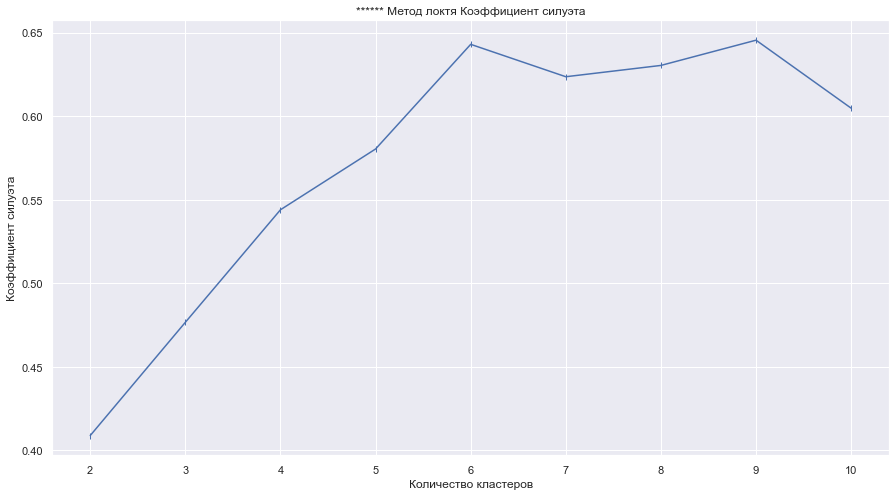

In [63]:
make_kmeans_silhouette(Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE)

In [64]:
make_3D_plot_kmeans(Etalon_no_SA_CA_oh_en_no_risk_scale_TSNE_3, n=2)

In [65]:
make_3D_plot_kmeans(Etalon_no_SA_CA_oh_en_no_risk_scale_PCA_3, n=2)

In [66]:
make_3D_plot_kmeans(Etalon_no_SA_CA_oh_en_no_risk_scale_UMAP_3)

# Часть 3. Интерпретация.

исходя из  того, что у нас задача кредитного скоринга, то буду придерживаться, что корректно произвести деление на 2 кластера

In [1]:
# проведем кластеризацию на два кластера
kmeans = KMeans(n_clusters=2)

kmeans.fit(Etalon_no_SA_CA_oh_en_no_risk_scale)
labels = kmeans.labels_

NameError: name 'KMeans' is not defined

In [68]:
pd.DataFrame(labels).value_counts()

0    713
1    287
dtype: int64

In [69]:
inversed = make_scale(Etalon_no_SA_CA_oh_en_no_risk, inv=1)

In [70]:
Inversed_Etalon_df = pd.DataFrame(inversed, columns=Etalon_no_SA_CA_oh_en_no_risk.columns)
Inversed_Etalon_df['labels'] = labels

In [71]:
sns.set(rc={"figure.figsize":( 10, 6 )})

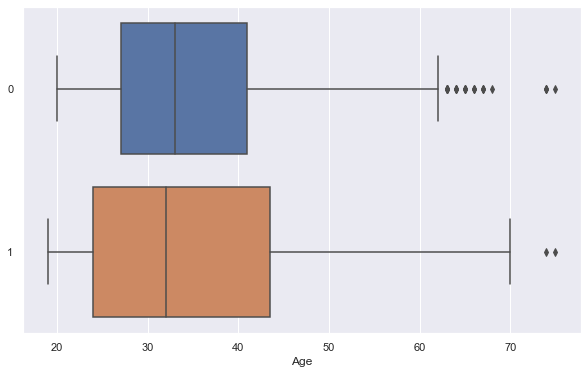

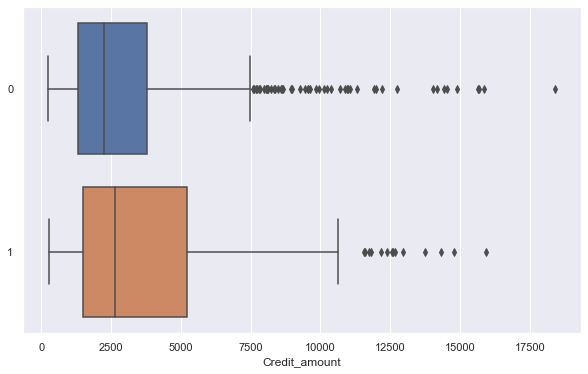

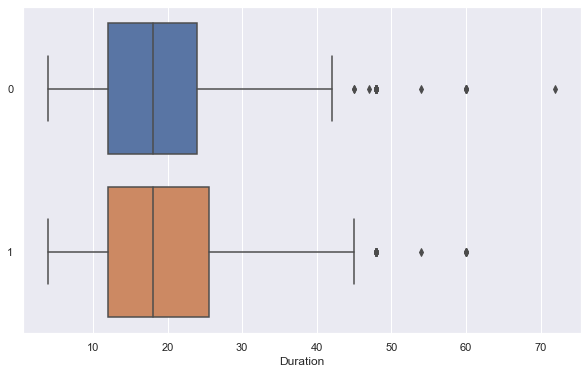

In [72]:
for col in Inversed_Etalon_df[['Age', 'Credit_amount', 'Duration']].columns:
    sns.boxplot(data=Inversed_Etalon_df, x=col, y=labels, orient='h')
    plt.show()

<AxesSubplot:>

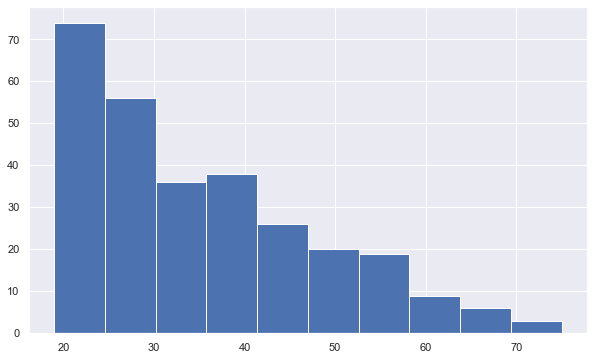

In [73]:
Inversed_Etalon_df.query('labels == 1')['Age'].hist()

<AxesSubplot:>

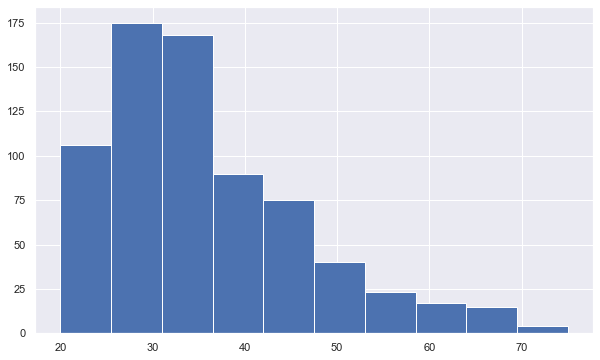

In [74]:
Inversed_Etalon_df.query('labels == 0')['Age'].hist()

<AxesSubplot:>

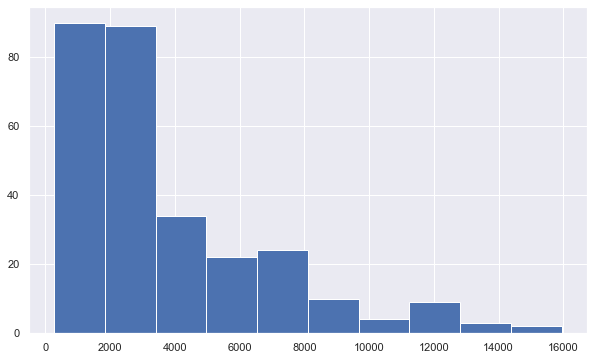

In [75]:
Inversed_Etalon_df.query('labels == 1')['Credit_amount'].hist()

<AxesSubplot:>

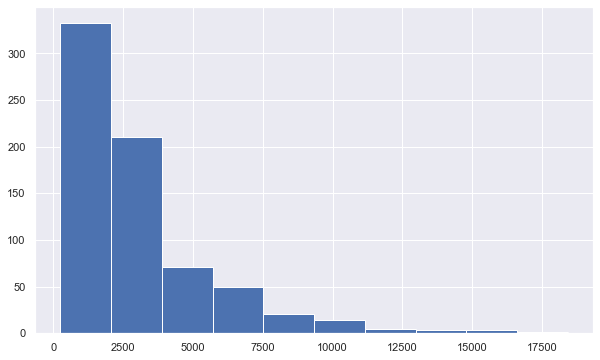

In [76]:
Inversed_Etalon_df.query('labels == 0')['Credit_amount'].hist()

In [77]:
Inversed_Etalon_df[['Age', 'Credit_amount', 'Duration', 'Job', 'labels']].groupby('labels').mean().T.round(2)

labels               0        1
Age             35.590   35.430
Credit_amount 3060.940 3793.760
Duration        20.330   22.330
Job              1.880    1.970

в кластерах, разделённых k-means, не наблюдается чёткая закономерность и определить какой кластер соответствует клиентам, кому отказали в кредите, а кому одобрили не получится. хотя, надо отметить, что разделение такое же как у оригинального датасета с целевой переменной ~ 7:3.